# Course Project - New York city Taxi trip duration predictions

This notebook is for the course https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms.

The objectives for this notebook are :

* Understanding and defining the input and target columns.
* Perform Exploratory Data Analysis.
* Splitting the dataset into training, validation and test sets.
* Try and fit different machine learning models to the data and find out the best model.
* Hyperparameter tuning
* Feature Engineering
* Making Predictions on the test set.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
!pip install plotly numpy pandas matplotlib seaborn opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --quiet

In [4]:

jovian.commit(project="machine-learning-course-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jeetmia1/new-york-taxi-trip-duration-prediction" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jeetmia1/new-york-taxi-trip-duration-prediction


'https://jovian.ai/jeetmia1/new-york-taxi-trip-duration-prediction'

## Problem Statement:

> The dataset is based on the [2016 NYC Yellow Cab trip record](https://cloud.google.com/bigquery/public-data) data made available in Big Query on Google Cloud Platform. The data was originally published by the [NYC Taxi and Limousine Commission (TLC)](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.
>
>
>
> You can find the data here: https://www.kaggle.com/c/nyc-taxi-trip-duration/data



## Let's download the data first

In [5]:
import os
import opendatasets as od
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [6]:
od.download('https://www.kaggle.com/c/nyc-taxi-trip-duration/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jeetsingh72
Your Kaggle Key: ········


100%|██████████| 85.8M/85.8M [00:02<00:00, 43.6MB/s]



Extracting archive ./nyc-taxi-trip-duration/nyc-taxi-trip-duration.zip to ./nyc-taxi-trip-duration


List the files found in the downloaded folder

In [7]:
os.listdir('./nyc-taxi-trip-duration')

['test.zip', 'train.zip', 'sample_submission.zip']

Unzip the zip files containing the train and test set CSV files using `zipfile` function

In [8]:
import zipfile
with zipfile.ZipFile('./nyc-taxi-trip-duration/train.zip', 'r') as zip_ref:
    zip_ref.extractall('./nyc-taxi-trip-duration/train')
os.listdir('./nyc-taxi-trip-duration/train')

['train.csv']

In [9]:
with zipfile.ZipFile('./nyc-taxi-trip-duration/test.zip', 'r') as zip_ref:
    zip_ref.extractall('./nyc-taxi-trip-duration/test')
os.listdir('./nyc-taxi-trip-duration/test')

['test.csv']

In [10]:
train_df=pd.read_csv('./nyc-taxi-trip-duration/train/train.csv')
test_df=pd.read_csv('./nyc-taxi-trip-duration/test/test.csv')

In [11]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [12]:
test_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [13]:
train_df.shape

(1458644, 11)

In [14]:
test_df.shape

(625134, 9)

In [15]:
# convert pickup dateime and dropoff datetime into date-time object
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
train_df['dropoff_datetime']=pd.to_datetime(train_df['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')


In [16]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [17]:
test_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [18]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [19]:
train_df=train_df[train_df.trip_duration<100000]

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458640 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458640 non-null  object        
 1   vendor_id           1458640 non-null  int64         
 2   pickup_datetime     1458640 non-null  datetime64[ns]
 3   dropoff_datetime    1458640 non-null  datetime64[ns]
 4   passenger_count     1458640 non-null  int64         
 5   pickup_longitude    1458640 non-null  float64       
 6   pickup_latitude     1458640 non-null  float64       
 7   dropoff_longitude   1458640 non-null  float64       
 8   dropoff_latitude    1458640 non-null  float64       
 9   store_and_fwd_flag  1458640 non-null  object        
 10  trip_duration       1458640 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 133.5+ MB


In [21]:
#jovian.commit()

## Preprocessing the data



### Date



In [22]:
train_df['pickup_year'] = train_df.pickup_datetime.dt.year
train_df['pickup_month'] = train_df.pickup_datetime.dt.month
train_df['pickup_day'] = train_df.pickup_datetime.dt.day
train_df['pickup_hour'] = train_df.pickup_datetime.dt.hour
train_df['pickup_minute'] = train_df.pickup_datetime.dt.minute
train_df['pickup_dayofweek'] = train_df.pickup_datetime.dt.isocalendar().day

/tmp/ipykernel_109/574756667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['pickup_year'] = train_df.pickup_datetime.dt.year
/tmp/ipykernel_109/574756667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['pickup_month'] = train_df.pickup_datetime.dt.month
/tmp/ipykernel_109/574756667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [23]:
test_df['pickup_year'] = test_df.pickup_datetime.dt.year
test_df['pickup_month'] = test_df.pickup_datetime.dt.month
test_df['pickup_day'] = test_df.pickup_datetime.dt.day
test_df['pickup_hour'] = test_df.pickup_datetime.dt.hour
test_df['pickup_minute'] = test_df.pickup_datetime.dt.minute
test_df['pickup_dayofweek'] = test_df.pickup_datetime.dt.isocalendar().day

In [24]:
train_df['dropoff_year'] = train_df.dropoff_datetime.dt.year
train_df['dropoff_month'] = train_df.dropoff_datetime.dt.month
train_df['dropoff_day'] = train_df.dropoff_datetime.dt.day
train_df['dropoff_hour'] = train_df.dropoff_datetime.dt.hour
train_df['dropoff_minute'] = train_df.dropoff_datetime.dt.minute
train_df['dropoff_dayofweek'] = train_df.dropoff_datetime.dt.isocalendar().day

/tmp/ipykernel_109/3146465282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['dropoff_year'] = train_df.dropoff_datetime.dt.year
/tmp/ipykernel_109/3146465282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['dropoff_month'] = train_df.dropoff_datetime.dt.month
/tmp/ipykernel_109/3146465282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

## Visualization of Data

In [25]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Trip Duration (in hour)')

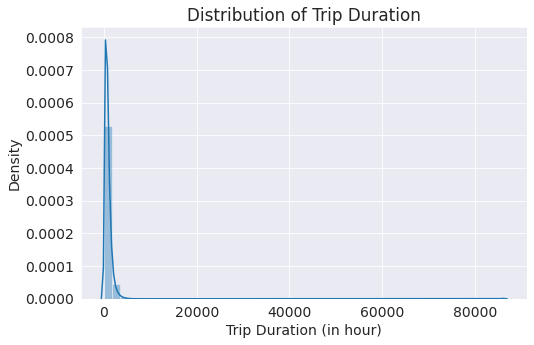

In [26]:
plt.figure(figsize=(8,5))
sns.distplot(train_df['trip_duration']).set_title("Distribution of Trip Duration")
plt.xlabel("Trip Duration (in hour)")

(-74.03, -73.75)

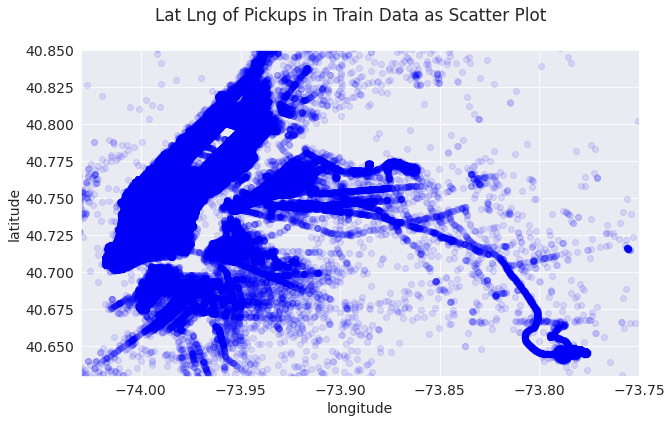

In [27]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=1, sharex=True, sharey=True)
ax.scatter(train_df['pickup_longitude'], train_df['pickup_latitude'],
              color='blue', label='train', alpha=0.1)

fig.suptitle('Lat Lng of Pickups in Train Data as Scatter Plot')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

Text(0.5, 1.0, 'Pickup Hours Distribution')

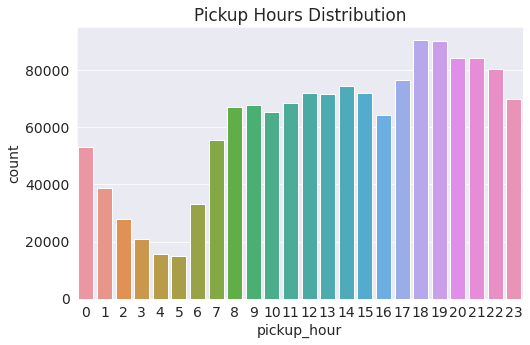

In [28]:
## which hours are pickup and dropoff higher?

plt.figure(figsize=(8,5))
sns.countplot(x=train_df['pickup_hour']).set_title("Pickup Hours Distribution")

Text(0.5, 1.0, 'Pickup Day of Week Distribution')

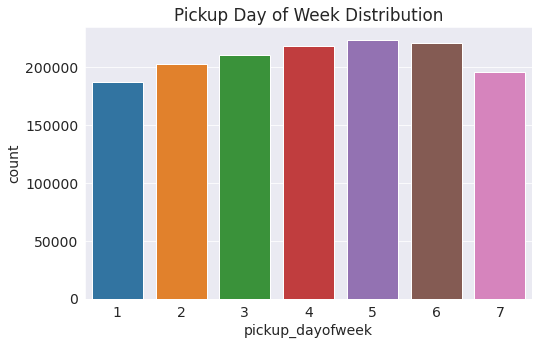

In [29]:
## which hours are pickup and dropoff higher?

plt.figure(figsize=(8,5))
sns.countplot(x=train_df['pickup_dayofweek']).set_title("Pickup Day of Week Distribution")

In [30]:
#jovian.commit()

## More preprocessing :

### Creating a train, validation split

In [31]:
month = pd.to_datetime(train_df.pickup_datetime).dt.month
val_df = train_df[month == 6]
train_df = train_df[month < 6]



In [32]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)


train_df.shape : (1224324, 23)
val_df.shape : (234316, 23)
test_df.shape : (625134, 15)


In [33]:
train_df=train_df.drop(['pickup_datetime','dropoff_datetime','pickup_dayofweek'], axis=1)
val_df=val_df.drop(['pickup_datetime','dropoff_datetime','pickup_dayofweek'], axis=1)
test_df=test_df.drop(['pickup_datetime','pickup_dayofweek'], axis=1)

## Identifying Input and Target columns :

In [34]:
input_cols=list(['id', 'vendor_id',  'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag','pickup_year', 'pickup_month', 'pickup_day',
       'pickup_hour','pickup_minute' ])
target_cols=list(['trip_duration'])

In [35]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()
train_targets = train_targets.values.reshape(len(train_targets),)

In [36]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()
val_targets = val_targets.values.reshape(len(val_targets),)

In [37]:
test_inputs=test_df.copy()

We will now find out the numerical and categorical columns of our dataset using the `select_dtypes` method.

In [38]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [39]:
numeric_cols=['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

In [40]:
print(numeric_cols)


['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']


In [41]:
print(categorical_cols)


['id', 'store_and_fwd_flag']


## Imputing missing numeric values



In [42]:
train_df.isna().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_year           0
pickup_month          0
pickup_day            0
pickup_hour           0
pickup_minute         0
dropoff_year          0
dropoff_month         0
dropoff_day           0
dropoff_hour          0
dropoff_minute        0
dropoff_dayofweek     0
dtype: int64

In [43]:
val_df.isna().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_year           0
pickup_month          0
pickup_day            0
pickup_hour           0
pickup_minute         0
dropoff_year          0
dropoff_month         0
dropoff_day           0
dropoff_hour          0
dropoff_minute        0
dropoff_dayofweek     0
dtype: int64

In [44]:
test_df.isna().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
pickup_year           0
pickup_month          0
pickup_day            0
pickup_hour           0
pickup_minute         0
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
#imputer = SimpleImputer(strategy = 'mean').fit(train_df[numeric_cols])

In [47]:
#train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
#val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
#test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

## Scaling Numerical Features:


In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [50]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [51]:
val_inputs.describe().loc[['min', 'max']]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute
min,0.0,0.000,0.779015,0.327605,0.780064,0.53639,2016.0,6.0,1.0,0.0,0.0
max,1.0,1.125,0.848569,0.462249,0.848569,0.87546,2016.0,6.0,30.0,23.0,59.0


## Encoding Categorical Data:




In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
encoder = OrdinalEncoder().fit(train_df[categorical_cols])

In [54]:
train_inputs[categorical_cols] = encoder.fit_transform(train_inputs[categorical_cols])
val_inputs[categorical_cols] = encoder.fit_transform(val_inputs[categorical_cols])
test_inputs[categorical_cols] = encoder.fit_transform(test_inputs[categorical_cols])

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Training our model:
 


### Training an Adaboost Regressor model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model1 = AdaBoostRegressor(random_state=42)

In [ ]:
model1.fit(train_inputs, train_targets)

### Evaluating the Adaboost Regressor  model

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [ ]:
train_preds1 = model1.predict(train_inputs)
train_preds1

In [ ]:
rmse(train_targets, train_preds1)

In [ ]:
val_preds1=model1.predict(val_inputs)

In [ ]:
rmse(val_targets,val_preds1)

### Training XGB model

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state=42,n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
model.fit(train_inputs, train_targets)

### Evaluating XGB model

Let's evaluate the decision tree using the accuracy score.

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [ ]:
train_preds = model.predict(train_inputs)
train_preds

In [ ]:
rmse(train_targets, train_preds)

In [ ]:
val_preds=model.predict(val_inputs)

In [ ]:
rmse(val_targets,val_preds)

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [ ]:
model.feature_importances_

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

In [ ]:
plt.title('Important Features')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
jovian.commit()

## Hyperparameter Tuning 

In [ ]:
def test_params(model,**params):
    if (model=='XGBoost'):
        model = XGBRegressor(objective='reg:squarederror',
                             tree_method= 'gpu_hist',
                             random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
        train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
        val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
        return train_rmse, val_rmse
    else :
        model = AdaBoostRegressor(random_state=42, **params).fit(train_inputs, train_targets)
        train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
        val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
        return train_rmse, val_rmse

In [ ]:
def test_param_and_plot(param_name, param_values,model):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(model,**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

## Hyperparameter tuning for the XGBoost model

### max_depth

We have to make sure the value of max_depth is in balance or our ML model will memorize the historical which would lead to overfitting and we don't want that.

In [ ]:
test_param_and_plot('max_depth', [2,4,5,6,8,10],'XGBoost')

Best depth is for max_depth=5

###  learning_rate

In [ ]:
test_param_and_plot('learning_rate', [0.001,0.01,0.1,0.3],'XGBoost')

Best learning rate is: 0.1

### n_estimators

The higher the number of estimators , the higher the accuracy of the model but to train a large amount of estimators it takes alot of time.

In [ ]:
test_param_and_plot('n_estimators', [10,20,50,100,500],'XGBoost')

Best number of estimators found: 20

### min_child_weight

Defines the minimum sum of weights of all observations required in a child.
It is used to control over-fitting. However, too high values can lead to under-fitting so cross-validation techniques need to be applied to define the best value for the model. 

In [ ]:
test_param_and_plot('min_child_weight', [0.5,1,2,4,5],'XGBoost')

Best value before underfitting is 1

### eta


In [ ]:
test_param_and_plot('eta', [0.001,0.01,0.1,0.2],'XGBoost')

Best value: 0.1

### subsample


In [ ]:
test_param_and_plot('subsample', [0.5,0.8,1],'XGBoost')

### alpha


In [ ]:
test_param_and_plot('alpha', [0,1,50,100,1000],'XGBoost')

## Hyperparameter Tuning with Adaboost Regressor model:

## n_estimators

In [ ]:
test_param_and_plot('n_estimators', [10,20,50,100,500],'Adaboost')

## learning rate

In [ ]:
test_param_and_plot('learning_rate', [0.001,0.8,1],'AdaBoost')

## loss


In [ ]:
test_param_and_plot('loss', ['linear', 'square', 'exponential'],'AdaBoost')

## Training models with the suitable hyperparameters

In [ ]:
xgbmodel_final=XGBRegressor(objective='reg:squarederror',
                             tree_method= 'gpu_hist',random_state=42, n_jobs=-1, n_estimators=20, max_depth=5,learning_rate=0.1,subsample=1,min_child_weight=1)

In [ ]:
xgbmodel_final.fit(train_inputs,train_targets)

In [ ]:
adamodel_final=AdaBoostRegressor(random_state=42,  n_estimators=20,learning_rate=0.8,loss='square',)

In [ ]:
adamodel_final.fit(train_inputs,train_targets)

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

## for XGB model:

In [ ]:
train_preds = xgbmodel_final.predict(train_inputs)
train_preds

In [ ]:
rmse(train_targets, train_preds)

In [ ]:
val_preds = xgbmodel_final.predict(val_inputs)
val_preds

In [ ]:
rmse(val_targets, val_preds)

In [ ]:
test_preds = xgbmodel_final.predict(test_inputs)
test_preds

## for Adaboost model:

In [ ]:
train_preds = adamodel_final.predict(train_inputs)
train_preds

In [ ]:
rmse(train_targets, train_preds)

In [ ]:
val_preds = adamodel_final.predict(val_inputs)
val_preds

In [ ]:
rmse(val_targets, val_preds)

In [ ]:
test_preds = adamodel_final.predict(test_inputs)
test_preds

#### The RMSE for validation set on the Adaboost model is slightly lower than the XGBmodel, so we can say that the Adaboost model is more accurate in this case.

## Let's Save and Load our Models

We can use the `joblib` module to save and load Python objects on the disk. 

In [ ]:
import joblib

In [ ]:
taxi_trip = {
    'adaboost': adamodel_final,
    'xgboost': xgbmodel_final,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols
}

We can now save this to a file using `joblib.dump`

In [ ]:
joblib.dump(taxi_trip, 'taxi_trip.joblib')

In [ ]:
taxi_trip1 = joblib.load('taxi_trip.joblib')

In [ ]:
jovian.commit(outputs=['taxi_trip.joblib'])

# Summary

## which hours are pickup and dropoff higher?

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train_df['pickup_hour']).set_title("Pickup Hours Distribution")

## which hours are pickup and dropoff higher ?

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=train_df['pickup_dayofweek']).set_title("Pickup Day of Week Distribution")

## most important features of the dataset

In [ ]:
plt.title('Important Features')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Best Model

In [ ]:
#Adaboost
val_preds = adamodel_final.predict(val_inputs)
val_preds


rmse(val_targets, val_preds)

In [ ]:
#XGBmodel
val_preds = xgbmodel_final.predict(val_inputs)
val_preds

rmse(val_targets, val_preds)

#### The RMSE for validation set on the Adaboost model is slightly lower than the XGBmodel, so we can say that the Adaboost model is more accurate in this case.

# Future Work

This dataset can be used to build a model that predicts the total ride duration of taxi trips in New York City. Our primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## References

* [Kaggle](https://www.kaggle.com/c/nyc-taxi-trip-duration/code)
* [Scikit-learn](https://scikit-learn.org/)
* [Parameter tuning with XGBoost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
* [Jovian AI Machine learning course](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/)
* [Notebook](https://www.kaggle.com/yurimhwang/new-york-city-taxi-trip-duration-yr)

## Submit project


In [ ]:
jovian.submit(assignment="zerotogbms-project")